# Project1- Analysis of Human Induced Earthquakes

In [37]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ipywidgets.embed import embed_minimal_html
import scipy.stats as stats
from pylab import *
import gmaps

# Import API key
from config import gkey

In [2]:
# Reading the data from CSV file into a data frame
sig_eq_file = "Resources/Significant_Earthquakes.csv"
sig_eq_df = pd.read_csv(sig_eq_file)

sig_eq_df.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,6250,Tsu,1908,2.0,6.0,NaN,NaN,NaN,130.0,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6251,Tsu,1908,2.0,14.0,11.0,25.0,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2832,NaN,1908,3.0,5.0,2.0,16.0,NaN,NaN,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7527,Tsu,1908,3.0,23.0,12.0,20.0,NaN,NaN,6.6,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,2833,NaN,1908,3.0,26.0,23.0,3.0,30,80.0,8.1,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [3]:
#All the columns of the dataframe along with their count
sig_eq_df.count()



I_D                                   3268
FLAG_TSUNAMI                           899
YEAR                                  3268
MONTH                                 3265
DAY                                   3262
HOUR                                  3114
MINUTE                                3093
SECOND                                3091
FOCAL_DEPTH                           2647
EQ_PRIMARY                            3001
EQ_MAG_MW                             1047
EQ_MAG_MS                             2095
EQ_MAG_MB                             1755
EQ_MAG_ML                              157
EQ_MAG_MFA                               1
EQ_MAG_UNK                             492
INTENSITY                             1281
COUNTRY                               3268
STATE                                  191
LOCATION_NAME                         3268
LATITUDE                              3262
LONGITUDE                             3262
REGION_CODE                           3268
DEATHS     

In [4]:
#Data type of each of the dataframe columns
sig_eq_df.dtypes


I_D                                     int64
FLAG_TSUNAMI                           object
YEAR                                    int64
MONTH                                 float64
DAY                                   float64
HOUR                                  float64
MINUTE                                float64
SECOND                                 object
FOCAL_DEPTH                           float64
EQ_PRIMARY                            float64
EQ_MAG_MW                             float64
EQ_MAG_MS                             float64
EQ_MAG_MB                             float64
EQ_MAG_ML                             float64
EQ_MAG_MFA                            float64
EQ_MAG_UNK                            float64
INTENSITY                             float64
COUNTRY                                object
STATE                                  object
LOCATION_NAME                          object
LATITUDE                               object
LONGITUDE                         

In [5]:
#Removing the unwanted columns
sig_eq_df = sig_eq_df[['YEAR', 'EQ_PRIMARY', 'COUNTRY', 'LOCATION_NAME', 'LATITUDE', 'LONGITUDE']]
sig_eq_df.head()

,YEAR,EQ_PRIMARY,COUNTRY,LOCATION_NAME,LATITUDE,LONGITUDE
0,1908,7.5,INDONESIA,SW. SUMATRA,-2,100.0
1,1908,6.0,USA,ALASKA: GULF OF ALASKA,61,-146.2
2,1908,7.5,PHILIPPINES,PHILIPPINES: MINDANAO,9,126.0
3,1908,6.6,INDONESIA,INDONESIA: TIMOR,-10,129.0
4,1908,8.1,MEXICO,MEXICO: GUERRERO,18,-99.0


In [6]:
#Data Cleaning

#Renaming the columns in lower case
clean_eq_df = sig_eq_df.rename(columns={"YEAR": "Year",
                                      "EQ_PRIMARY": "Magnitude",
                                      "COUNTRY": "Country",
                                      "LOCATION_NAME": "Location",
                                      "LONGITUDE" : "Longitude",
                                      "LATITUDE" : "Latitude"})



In [7]:
#Removing all the rows with NaN values
clean_eq_df = clean_eq_df.dropna(how = "any")
clean_eq_df.count()

Year         3001
Magnitude    3001
Country      3001
Location     3001
Latitude     3001
Longitude    3001
dtype: int64

In [8]:
#Converting the white space from Latitude column to NaN values and converting the column to float data type

clean_eq_df["Latitude"] = pd.to_numeric(clean_eq_df["Latitude"], errors = 'coerce')

#Removing the rows with NaN values that were created after the above command
clean_eq_df = clean_eq_df.dropna(how = "any")
clean_eq_df.count()

Year         2997
Magnitude    2997
Country      2997
Location     2997
Latitude     2997
Longitude    2997
dtype: int64

In [9]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [10]:
# Store 'Latitude' and 'Longitude' into  locations 
locations = clean_eq_df[["Latitude", "Longitude"]]

#Extracting the magnitude column of the dataframe
magnitude = clean_eq_df["Magnitude"]


In [11]:
# Create a earthquake Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights = magnitude, 
                                 dissipating=False, max_intensity=8, point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 8
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
# Reading the Human Induced Earthquake data from CSV file into a data frame
hi_eq_file = "Resources/The_Human_Induced_Earthquake_Database - HiQuake.csv"
hi_eq_df = pd.read_csv(hi_eq_file)
hi_eq_df.head()

,Country,Earthquake cause (main class),Earthquake cause (subclass),Project name,Latitude (approximate),Longitude (approximate),Project start date,Project end date,Seismicity or monitoring start date,Seismicity or monitoring end date,...,Maximum injection/extraction rate (max unless stated),Rate units,Total volume or mass of material injected/extracted,Volume or mass units,Maximum injection pressure (MPa),Change in reservoir pressure (MPa),Stress change (MPa),Bottom hole temperature (°C),Notes,Reference(s)
0,Algeria,CCS,CO2 injection,In Salah,29.088942,2.213826,2004,NaN,2009 (August),2011 (June),...,43,mcf/day,"3850000 (as of 2013), 3500000 (m3)",tonnes,16,12 (modelled),NaN,NaN,Injection into gas field but no apparent conne...,"Oye et al. (2013), Stork et al. (2015), Verdon..."
1,USA,CCS,CO2 injection,"Decatur, Illinois, demonstration site",39.876933,-88.89336,2011 (November),2014 (November),2013 (July),2014 (December),...,11.6,kg/s,"1000000, 910000 (m3)",tonnes,NaN,NaN,NaN,NaN,Volume assuming liquid CO2 density of 1100 kg/m3,Kaven et al. (2015)
2,Botswana,Coal Bed Methane (CBM),Coal Bed Methane (CBM),Selemo and Lesedi pilot pods,-22.586373,25.84591,2014,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albano et al. (2017) provide strong evidence f...,Barbee (2017)
3,UK,Construction,Coastal engineering (geoengineering),Folkestone,51.104297,1.271382,1806,NaN,NaN,NaN,...,NaN,NaN,2800000000,kg,NaN,NaN,0.001-0.03,NaN,Samphire Hoe a much more likely trigger as lar...,Klose (2007a)
4,Taiwan,Construction,Construction,Taipei 101,25.033985,121.56442,NaN,NaN,NaN,NaN,...,NaN,NaN,258138 (proxy),NaN,NaN,NaN,0.47,NaN,Assume steel density of 8000 kg/m3,Lin (2005)


In [13]:
#Removing the unwanted columns and determing the count of rows for each column
hi_eq_df = hi_eq_df[['Country', 'Earthquake cause (main class)', 'Earthquake cause (subclass)', 'Project name', 'Latitude (approximate)', 'Longitude (approximate)', 'Observed maximum magnitude (Mmax)']]
hi_eq_df.count()

Country                              821
Earthquake cause (main class)        821
Earthquake cause (subclass)          820
Project name                         821
Latitude (approximate)               796
Longitude (approximate)              796
Observed maximum magnitude (Mmax)    663
dtype: int64

In [14]:
#Data Cleaning
#Removing all the rows with NaN values
clean_HI_eq_df = hi_eq_df.dropna(how = "any")
clean_HI_eq_df.count()

Country                              651
Earthquake cause (main class)        651
Earthquake cause (subclass)          651
Project name                         651
Latitude (approximate)               651
Longitude (approximate)              651
Observed maximum magnitude (Mmax)    651
dtype: int64

In [15]:
#Converting the white space from Latitude column to NaN values and converting the column to float data type
clean_HI_eq_df["Longitude (approximate)"] = pd.to_numeric(clean_HI_eq_df["Longitude (approximate)"], errors = 'coerce')

#Removing all the rows with NaN values which were created due to the above command
clean_HI_eq_df = clean_HI_eq_df.dropna(how="any")
clean_HI_eq_df.count()

C:\Users\HimaniAkshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Country                              649
Earthquake cause (main class)        649
Earthquake cause (subclass)          649
Project name                         649
Latitude (approximate)               649
Longitude (approximate)              649
Observed maximum magnitude (Mmax)    649
dtype: int64

In [16]:
# Store 'Latitude (approximate)' and 'Longitude (approximate)' into  locations
hieq_locations = clean_HI_eq_df[["Latitude (approximate)", "Longitude (approximate)"]]
hieq_locations.head()

,Latitude (approximate),Longitude (approximate)
0,29.088942,2.213826
1,39.876933,-88.893360
2,-22.586373,25.845910
3,51.104297,1.271382
4,25.033985,121.564420


In [17]:
#Extracting the magnitude column of the dataframe
magnitude = clean_eq_df["Magnitude"]

#Creating the human induced earthquake symbol layer
hieq_layer = gmaps.symbol_layer(hieq_locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2)


In [18]:
fig = gmaps.figure()

#Add both the heatmap layer of natural earthquakes and symbol layer of human induced earthquakes to the fig
fig.add_layer(heat_layer)
fig.add_layer(hieq_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
#Grouping the earthquakes based on cause and sorting them to find the top causes leading to maximum earthquakes
hi_cause_grpby_df = clean_HI_eq_df.groupby(["Earthquake cause (main class)"])

hi_cause_grpby_df = hi_cause_grpby_df.count().reset_index()


hi_cause_grpby_df = hi_cause_grpby_df.sort_values("Earthquake cause (subclass)", ascending = False).head(8)
hi_cause_grpby_df

,Earthquake cause (main class),Country,Earthquake cause (subclass),Project name,Latitude (approximate),Longitude (approximate),Observed maximum magnitude (Mmax)
7,Mining,189,189,189,189,189,189
13,Water reservoir impoundment,177,177,177,177,177,177
3,Conventional Oil and Gas,98,98,98,98,98,98
5,Geothermal,57,57,57,57,57,57
4,Fracking,45,45,45,45,45,45
12,Waste fluid disposal,40,40,40,40,40,40
8,Nuclear explosions,12,12,12,12,12,12
11,Research,10,10,10,10,10,10


In [20]:
#Filtering the dataframe for top 5 causes
mining_countries = clean_HI_eq_df.loc[clean_HI_eq_df["Earthquake cause (main class)"]=="Mining"]

wri_countries = clean_HI_eq_df.loc[clean_HI_eq_df["Earthquake cause (main class)"]=="Water reservoir impoundment"]

cog_countries = clean_HI_eq_df.loc[clean_HI_eq_df["Earthquake cause (main class)"]=="Conventional Oil and Gas"]


geo_countries = clean_HI_eq_df.loc[clean_HI_eq_df["Earthquake cause (main class)"]=="Geothermal"]

frack_countries = clean_HI_eq_df.loc[clean_HI_eq_df["Earthquake cause (main class)"]=="Fracking"]


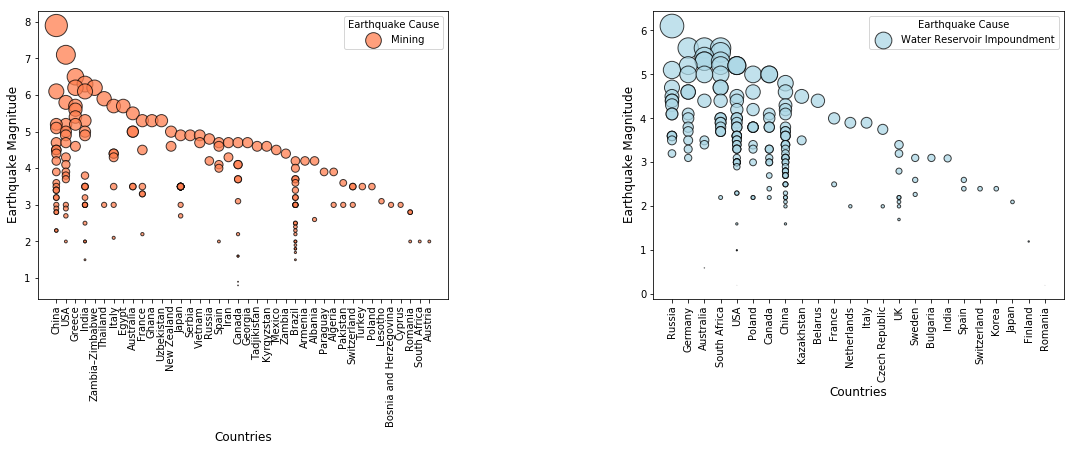

In [22]:
#For each of the top 4 causes - Creating scatter plots for countries vs magnitude
fig, ax = plt.subplots(1,2)


subplot(1,2,1)

plt.scatter(wri_countries["Country"],wri_countries["Observed maximum magnitude (Mmax)"], 
            s= wri_countries["Observed maximum magnitude (Mmax)"]**3, 
            marker="o", facecolors="coral", edgecolors="black", alpha=0.75, label = "Mining")
plt.xticks(rotation=90)
plt.xlabel("Countries", fontsize = 12)
plt.ylabel("Earthquake Magnitude", fontsize = 12)


# Create a legend
plt.legend(title ="Earthquake Cause", loc="upper right")
subplot(1,2,2)
plt.scatter(mining_countries["Country"],mining_countries["Observed maximum magnitude (Mmax)"], 
            s= mining_countries["Observed maximum magnitude (Mmax)"]**3.5, 
            marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75, label = "Water Reservoir Impoundment")


plt.subplots_adjust(left=None, bottom=9, right=2.5, top=10, wspace=0.5, hspace=2)


plt.xticks(rotation=90)
plt.xlabel("Countries", fontsize = 12)
plt.ylabel("Earthquake Magnitude", fontsize = 12)


# Create a legend
plt.legend(title ="Earthquake Cause", loc="upper right")



plt.xticks(rotation=90)

# Save Figure
plt.savefig("Images/MagvsCountriesSubplot1", bbox_inches='tight')
plt.show()


C:\Users\HimaniAkshay\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


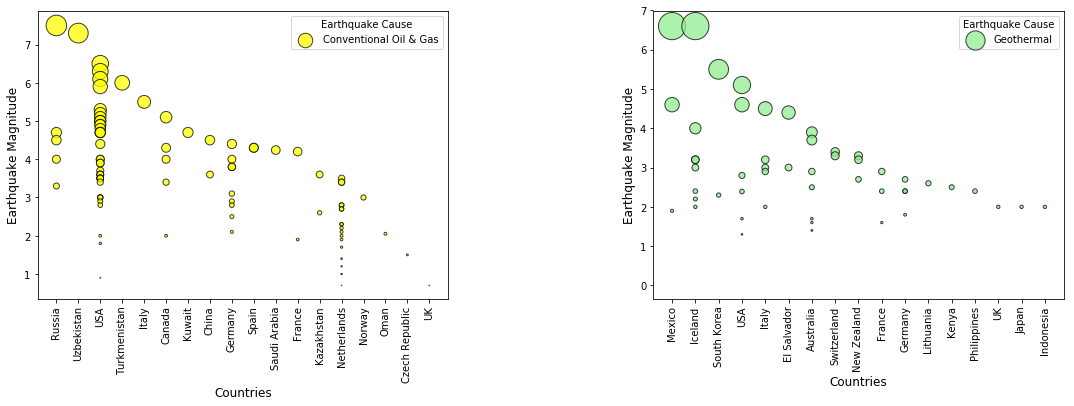

In [23]:
fig, ax = plt.subplots(1,2)


subplot(1,2,1)

plt.scatter(cog_countries["Country"],cog_countries["Observed maximum magnitude (Mmax)"], 
            s= cog_countries["Observed maximum magnitude (Mmax)"]**3, 
            marker="o", facecolors="yellow", edgecolors="black", alpha=0.75, label = "Conventional Oil & Gas")
plt.xticks(rotation=90)
plt.xlabel("Countries", fontsize = 12)
plt.ylabel("Earthquake Magnitude", fontsize = 12)
plt.legend(title ="Earthquake Cause", loc="upper right")

subplot(1,2,2)
plt.scatter(geo_countries["Country"],geo_countries["Observed maximum magnitude (Mmax)"], 
            s= geo_countries["Observed maximum magnitude (Mmax)"]**3.5, 
            marker="o", facecolors="lightgreen", edgecolors="black", alpha=0.75, label = "Geothermal")


plt.subplots_adjust(left=None, bottom=9, right=2.5, top=10, wspace=0.5, hspace=2)

plt.xticks(rotation=90)
plt.xlabel("Countries", fontsize = 12)
plt.ylabel("Earthquake Magnitude", fontsize = 12)


# Create a legend
plt.legend(title ="Earthquake Cause", loc="upper right")

# Save Figure
plt.savefig("Images/MagvsCountriesSubplot2", bbox_inches='tight')

plt.show()


In [25]:
#Creating scatter plot depicting the average value of earthquake magnitude varying across countries for the top 5 causes

# 1. MINING
mining_grpby_df = mining_countries.groupby("Country")
#Determining the top 8 countries impacted by mining induced earthquakes
mx_axis = mining_grpby_df.count().nlargest(8, "Project name").index.get_level_values(0).tolist()
mx_axis

#Converting to a dataframe
mining_df = mining_grpby_df.count().reset_index()
#Determining the number of earthquakes in each of the top impacted countries
my_axis = mining_df["Project name"].sort_values(ascending=False).nlargest(8).tolist()
my_axis
#Calculating the mean earthquake magnitude for top impacted countries
mag_mean = mining_grpby_df["Observed maximum magnitude (Mmax)"].mean().reset_index()
mag_mean['mag'] = mag_mean.Country.isin(mx_axis)
mag = mag_mean.loc[mag_mean["mag"]== True]
mag["Earthquake count"] = mining_df["Project name"]
mag = mag.rename(columns={"Observed maximum magnitude (Mmax)" : "Magnitude Mean"})
mag = mag[["Country", "Magnitude Mean", "Earthquake count"]]
mag = mag.sort_values(by = "Earthquake count", ascending=False)
s = mag["Magnitude Mean"].tolist()
magarray1 = np.array(s)
magarray1

C:\Users\HimaniAkshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([3.01190476, 3.28918919, 4.31176471, 3.12      , 4.22857143,
       4.20833333, 3.59166667, 4.27777778])

In [26]:
# 2. WATER RESERVOIR IMPOUNDMENT
wri_grpby_df = wri_countries.groupby("Country")
#Determining the top 8 countries impacted by water reservoir impoundment induced earthquakes
wrix_axis = wri_grpby_df.count().nlargest(8, "Project name").index.get_level_values(0).tolist()
wrix_axis
#Converting to a dataframe
wri_df = wri_grpby_df.count().reset_index()
#Determining the number of earthquakes in each of the top impacted countries
wriy_axis = wri_df["Project name"].sort_values(ascending=False).nlargest(8).tolist()
wriy_axis
#Calculating the mean earthquake magnitude for top impacted countries
mag_mean = wri_grpby_df["Observed maximum magnitude (Mmax)"].mean().reset_index()
mag_mean['mag'] = mag_mean.Country.isin(wrix_axis)
mag = mag_mean.loc[mag_mean["mag"]== True]
mag["Earthquake count"] = wri_df["Project name"]
mag = mag.rename(columns={"Observed maximum magnitude (Mmax)" : "Magnitude Mean"})
mag = mag[["Country", "Magnitude Mean", "Earthquake count"]]
mag = mag.sort_values(by = "Earthquake count", ascending=False)
s = mag["Magnitude Mean"].tolist()
magarray2 = np.array(s)
magarray2

C:\Users\HimaniAkshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([2.744     , 3.95      , 3.61666667, 3.50666667, 4.20666667,
       2.77272727, 5.6       , 3.91428571])

In [27]:
cog_grpby_df = cog_countries.groupby("Country")
#Determining the top 8 countries impacted by Conventional Oil & Gas induced earthquakes
cogx_axis = cog_grpby_df.count().nlargest(8, "Project name").index.get_level_values(0).tolist()
cogx_axis

#Converting to a dataframe
cog_df = cog_grpby_df.count().reset_index()
#Determining the number of earthquakes in each of the top impacted countries
cogy_axis = cog_df["Project name"].sort_values(ascending=False).nlargest(8).tolist()
cogy_axis
#Calculating the mean earthquake magnitude for top impacted countries
mag_mean = cog_grpby_df["Observed maximum magnitude (Mmax)"].mean().reset_index()
mag_mean['mag'] = mag_mean.Country.isin(cogx_axis)
mag = mag_mean.loc[mag_mean["mag"]== True]

mag["Earthquake count"] = cog_df["Project name"]
mag = mag.rename(columns={"Observed maximum magnitude (Mmax)" : "Magnitude Mean"})
mag = mag[["Country", "Magnitude Mean", "Earthquake count"]]
mag = mag.sort_values(by = "Earthquake count", ascending=False)


s = mag["Magnitude Mean"].tolist()
magarray3 = np.array(s)
magarray3

C:\Users\HimaniAkshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


array([4.02820513, 2.16315789, 3.26666667, 2.0125    , 4.8       ,
       4.05      , 3.05      , 3.1       ])

In [28]:
geo_grpby_df = geo_countries.groupby("Country")
#Determining the top 8 countries impacted by Geo Thermal induced earthquakes
geox_axis = geo_grpby_df.count().nlargest(8, "Project name").index.get_level_values(0).tolist()
geox_axis

#Converting to a dataframe
geo_df = geo_grpby_df.count().reset_index()
#Determining the number of earthquakes in each of the top impacted countries
geoy_axis = geo_df["Project name"].sort_values(ascending=False).nlargest(8).tolist()
geoy_axis
#Calculating the mean earthquake magnitude for top impacted countries
mag_mean = geo_grpby_df["Observed maximum magnitude (Mmax)"].mean().reset_index()
mag_mean['mag'] = mag_mean.Country.isin(geox_axis)
mag = mag_mean.loc[mag_mean["mag"]== True]
mag["Earthquake count"] = geo_df["Project name"]
mag = mag.rename(columns={"Observed maximum magnitude (Mmax)" : "Magnitude Mean"})
mag = mag[["Country", "Magnitude Mean", "Earthquake count"]]
mag = mag.sort_values(by = "Earthquake count", ascending=False)
s = mag["Magnitude Mean"].tolist()
magarray4 = np.array(s)
magarray4

C:\Users\HimaniAkshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([3.325     , 2.52857143, 2.27      , 1.38333333, 3.12      ,
       2.3       , 0.        , 4.36666667])

In [29]:
frack_grpby_df = frack_countries.groupby("Country")
#Determining the top 8 countries impacted by fracking induced earthquakes
fx_axis = frack_grpby_df.count().nlargest(8, "Project name").index.get_level_values(0).tolist()
fx_axis
#Converting to a dataframe
frack_df = frack_grpby_df.count().reset_index()
#Determining the number of earthquakes in each of the top impacted countries
fy_axis = frack_df["Project name"].sort_values(ascending=False).nlargest(8).tolist()
fy_axis
#Calculating the mean earthquake magnitude for top impacted countries
mag_mean = frack_grpby_df["Observed maximum magnitude (Mmax)"].mean().reset_index()
mag_mean['mag'] = mag_mean.Country.isin(fx_axis)
mag = mag_mean.loc[mag_mean["mag"]== True]
mag["Earthquake count"] = frack_df["Project name"]
mag = mag.rename(columns={"Observed maximum magnitude (Mmax)" : "Magnitude Mean"})
mag = mag[["Country", "Magnitude Mean", "Earthquake count"]]
mag = mag.sort_values(by = "Earthquake count", ascending=False)
s = mag["Magnitude Mean"].tolist()
magarray5 = np.array(s)
magarray5

array([3.2337931, 1.58     , 4.035    , 0.75     , 1.9      ])

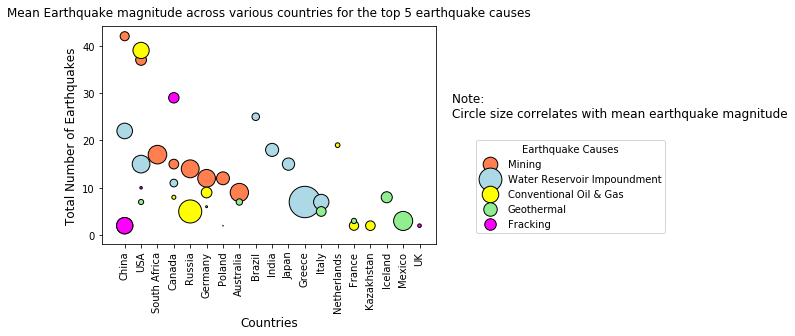

In [35]:
# Creating a scatter plot showing the variation in average earthquake magnitude for
#top 5 causes across most impacted countries

fig, ax = plt.subplots()
ax.scatter(mx_axis, my_axis, s = magarray1**4, 
           marker="o", facecolors="coral", edgecolors="black", alpha=1, label="Mining")
ax.scatter(wrix_axis, wriy_axis, s = magarray2**4, 
           marker="o", facecolors="lightblue", edgecolors="black", alpha=1, label="Water Reservoir Impoundment")
ax.scatter(cogx_axis, cogy_axis, s = magarray3**4,
           marker="o", facecolors="yellow", edgecolors="black", alpha=1, label="Conventional Oil & Gas" )
ax.scatter(geox_axis, geoy_axis, s = magarray4**4, 
           marker="o", facecolors="lightgreen", edgecolors="black", alpha=1, label="Geothermal")
ax.scatter(fx_axis, fy_axis, s = magarray5**4, 
           marker="o", facecolors="fuchsia", edgecolors="black", alpha=1, label="Fracking")

plt.xticks(rotation=90)
ax.text(20, 25, "Note: \nCircle size correlates with mean earthquake magnitude", 
        horizontalalignment='left', size='large', color='black')

# Create a legend
ax.legend(title ="Earthquake Causes", loc=9, bbox_to_anchor=(1.4, 0.5) )

# Incorporate the other graph properties
plt.title("Mean Earthquake magnitude across various countries for the top 5 earthquake causes")
rcParams['axes.titlepad'] = 10 
plt.xlabel("Countries", fontsize = 12)
plt.ylabel("Total Number of Earthquakes", fontsize = 12)

# Save Figure
plt.savefig("Images/MeanMagvsCauses.png")

plt.show()


In [31]:
#Conducting a statistical test to understand if the different causes lead to earthquake with varying magnitudes.

#Hypothesis: Different human induced causes (Mining, Water Reservoir Impoundment, 
#Conventional Oil & Gas , Geothermal activities) lead to different magnitudes of earthquakes 

#Null Hypothesis: Different human induced causes do not lead to varying earthquake magnitudes. 

#Assumptions
#Data is normally distributed
#Data is independent
#Data is homogenous

# Extract individual groups
group1 = mining_countries["Observed maximum magnitude (Mmax)"]
group2 = wri_countries["Observed maximum magnitude (Mmax)"]
group3 = cog_countries["Observed maximum magnitude (Mmax)"]
group4 = geo_countries["Observed maximum magnitude (Mmax)"]

In [32]:
stats.f_oneway(group1, group2, group3, group4)

# The p-value being <0.05, we can reject the null hypothesis and say that different human induced 
#earthquake causes lead to earthquakes of varying magnitudes

F_onewayResult(statistic=10.432269708676936, pvalue=1.128539289134419e-06)

In [33]:
#Conducting a statistical test to understand if the Mining across 3 different countries causes earthquake 
#with varying magnitudes.

#Hypothesis: Mining in different countries lead to different magnitudes of earthquakes 

#Null Hypothesis: Mining in different countries does not lead to varying earthquake magnitudes. 

#Assumptions
#Data is normally distributed
#Data is independent
#Data is homogenous

# Extract individual groups
group1 = mining_countries[mining_countries["Country"] == "China"]["Observed maximum magnitude (Mmax)"]
group2 = mining_countries[mining_countries["Country"] == "USA"]["Observed maximum magnitude (Mmax)"]
group3 = mining_countries[mining_countries["Country"] == "Australia"]["Observed maximum magnitude (Mmax)"]

stats.f_oneway(group1, group2, group3)

# The p-value being <0.05, we can reject the null hypothesis and say that Mining across different 
#countries does cause earthquakes with varying magnitudes.

F_onewayResult(statistic=5.420204985421187, pvalue=0.006088161629641385)

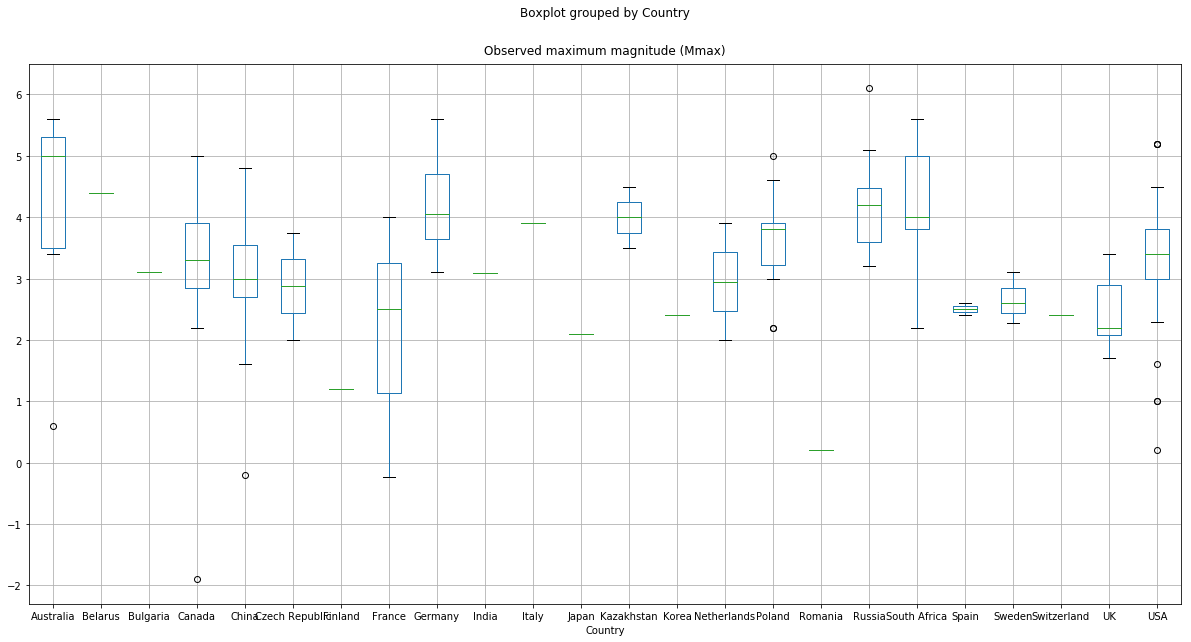

In [36]:
# Create a boxplot to compare means
mining_countries.boxplot("Observed maximum magnitude (Mmax)", by="Country", figsize=(20, 10))
# Save Figure
plt.savefig("Images/Boxplot.png")